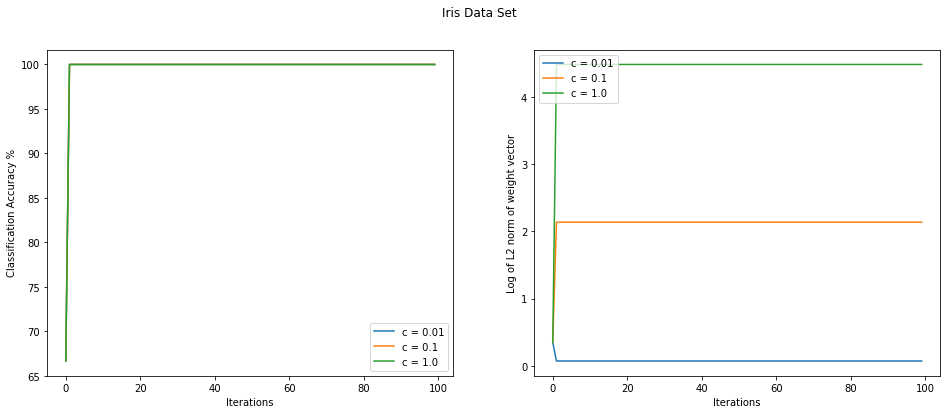

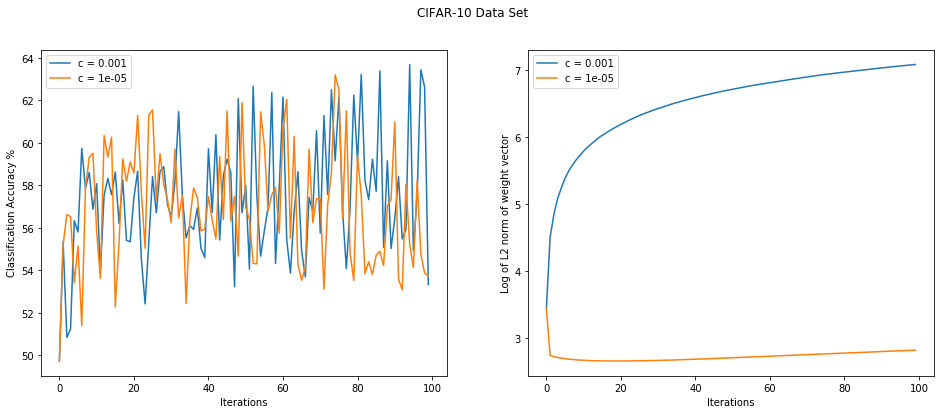

In [17]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt

class perceptron():
    def __init__(self,features,labels,learning_rates,num_iter,data_name):
        #inputs:    features        -data in the following format: rows are features and columns are samples
        #                           for example in the iris dataset with 4 features and 150 samples the size of
        #                           x should be 5x150 where the 5th row is all 1's (for the bias) (ndarray)
        #           labels          -the labels of the data are size nx1 where n is the number of samples (in)
        #                           the case of the iris dataset the size is 150x1 (ndarray)
        #           learning_rates  -the learning rate (scalar)
        #           num_iter    - number of times to update the weight vector
        self.x = features
        self.t = labels
        self.learning_rates = learning_rates
        self.c = 0
        self.num_iterations = num_iter
        self.accuracy_array = np.zeros(self.num_iterations)
        self.weight_norm_array = np.zeros(self.num_iterations)
        self.data_name = data_name
        num_outputs = 1 #since it's a binary problem (1 or 0)
        num_feat_plus_1 = np.shape(self.x)[0]
        #initialize weights, the +1 is because I'm including the bias in the weights
        self.w0 = np.random.rand(num_feat_plus_1, num_outputs) #size of w is #features x 1
    def calc_classification_accuracy(self):
        z = np.sign(np.dot(self.w.T,self.x)).T #perceptron classification output for all samples
        z = np.where(z < 0, 0, z) #change -1 to 0
        diff = self.t - z
        num_right = float(sum(num == 0 for num in diff))
        return (num_right/float(np.size(diff)))*100.0

    def run_perceptron(self):
        self.w = self.w0
        self.accuracy_array = np.zeros(self.num_iterations)
        self.weight_norm_array = np.zeros(self.num_iterations)
        for i in range(self.num_iterations):
            self.accuracy_array[i] = self.calc_classification_accuracy()
            self.weight_norm_array[i] = np.log(np.sqrt(np.dot(self.w.T,self.w)))
            for j in range(np.shape(self.x)[1]):
                zi = np.sign(np.dot(self.w.T,self.x[:,j])) #perceptron classification output for sample i
                zi = np.where(zi < 0, 0, zi) #change -1 to 0
                # update weights
                del_w = np.atleast_2d(self.c*np.dot((self.t[j,0]-zi[0]).T,self.x[:,j].T))
                self.w = self.w + del_w.T
        #return self.w, self.accuracy_array, self.weight_norm_array

    def gen_plots(self):
        legend = []
        width = 16
        height = 6
        plt.figure(figsize=(width, height))
        for j in range(len(self.learning_rates)):
            self.c = self.learning_rates[j]
            self.run_perceptron()
            plt.subplot(121)
            plt.plot(self.accuracy_array)
            plt.subplot(122)
            plt.plot(self.weight_norm_array)
            legend.append("c = " + str(self.learning_rates[j]))
        plt.subplot(121)
        plt.legend(legend)
        plt.xlabel('Iterations')
        plt.ylabel('Classification Accuracy %')
        plt.subplot(122)
        plt.legend(legend)
        plt.xlabel('Iterations')
        plt.ylabel('Log of L2 norm of weight vector')
        plt.suptitle(self.data_name)
        plt.show()

if __name__ == '__main__':
    #Load Iris Data Set and Store Data------------------------------------------------------------------------
    data = pandas.read_csv( 'Fisher.csv' )
    m = data.as_matrix()
    labels = m[:,0]
    labels[ labels==2 ] = 1  #label everything that is class 2 as class 1 so it is binary
    labels = np.atleast_2d( labels ).T
    features = m[:,1:5]
    num_samples = np.shape(features)[0]
    #dimension of x is 5x150
    x = np.concatenate((features.T,np.ones([1,num_samples])),axis=0) #stack  ones on to multiply the bias by
    #--------------------------------------------------------------------------------------------------------
    num_iterations = 100
    learning_rates = np.array([0.01, 0.1, 1.0]) #learning rate

    irisperceptron = perceptron(x,labels,learning_rates,num_iterations,'Iris Data Set')
    irisperceptron.gen_plots()

    #------------------------------------------------------
    #Load CIFAR-10 Data Set--------------------------------
    def unpickle( file ):
        import cPickle
        fo = open(file, 'rb')
        dict = cPickle.load(fo)
        fo.close()
        return dict
    #------------------------------------------------------
    data = unpickle( 'cifar-10-batches-py/data_batch_1' )

    features = data['data'].T
    labels = data['labels']
    labels = np.atleast_2d( labels ).T
    # squash classes 0-4 into class 0, and squash classes 5-9 into class 1
    labels[ labels < 5 ] = 0
    labels[ labels >= 5 ] = 1
    learning_rates = np.array([0.001, 0.00001])
    cifarperceptron = perceptron(features,labels,learning_rates,num_iterations,'CIFAR-10 Data Set')
    cifarperceptron.gen_plots()